# Part I: Find Predictors of Influence

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data = pd.read_csv('train.csv')

In [2]:
data.shape

(5500, 23)

In [3]:
data.head()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,...,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,...,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,...,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,...,17637,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907


## Data Cleaning: Calculate Differences and Ratios

In [4]:
# Make a new data frame for A - B
col_names = ['choice','follower','following','listed','mentions_rec','retweets_rec','mentions_sent',
                               'retweets_sent','posts','network_1','network_2','network_3']
data2 = pd.DataFrame(columns = col_names)

# Do some subtractions
data2.choice = data.Choice
data2.follower = data.A_follower_count - data.B_follower_count
data2.following = data.A_following_count - data.B_following_count
data2.listed = data.A_listed_count - data.B_listed_count
data2.mentions_rec = data.A_mentions_received - data.B_mentions_received
data2.retweets_rec = data.A_retweets_received - data.B_retweets_received
data2.mentions_sent = data.A_mentions_sent - data.B_mentions_sent
data2.retweets_sent = data.A_retweets_sent - data.B_retweets_sent
data2.posts = data.A_posts - data.B_posts
data2.network_1 = data.A_network_feature_1 - data.B_network_feature_1
data2.network_2 = data.A_network_feature_2 - data.B_network_feature_2
data2.network_3 = data.A_network_feature_3 - data.B_network_feature_3

 # Add new features to the data2set - ratio of the original data2set columns
data2["follower_ratio"] = data.A_follower_count/data.B_follower_count
data2["mentions_rec_ratio"] = data.A_mentions_received/data.B_mentions_received
data2["retweets_rec_ratio"] = data.A_retweets_received/data.B_retweets_received
data2["mentions_sent_ratio"] = data.A_mentions_sent/data.B_mentions_sent
data2["retweets_sent_ratio"] = data.A_retweets_sent/data.B_retweets_sent
data2["posts_ratio"] = data.A_posts/data.B_posts

# Head of data2
data2.head(5)

,choice,follower,following,listed,mentions_rec,retweets_rec,mentions_sent,retweets_sent,posts,network_1,network_2,network_3,follower_ratio,mentions_rec_ratio,retweets_rec_ratio,mentions_sent_ratio,retweets_sent_ratio,posts_ratio
0,0,-34235,-29506,-1686,-14.846518,-3.883525,-8.103828,-0.231920,-6.626665,-64,90.969697,9438.106061,0.006616,0.037846,0.025227,0.012250,0.302336,0.051819
1,0,-17671,331,-1382,49.961485,16.854685,2.481652,0.546816,4.106299,206,-113.587704,-1601.149290,0.549921,2.233769,2.884551,1.768866,1.968943,4.836513
2,0,3688,733,-105,24.768949,9.201969,4.758317,0.490702,2.986516,92,58.594502,5722.563574,2.018222,34.713213,26.966469,8.888426,5.882446,5.951102
3,0,-19542,-17630,-276,-565.184032,-390.016375,-26.220532,-7.067053,-29.271279,-1756,-21.469296,-1299.678967,0.001022,0.013425,0.000711,0.048327,0.014022,0.088176
4,1,38035,-849,2460,127.252413,33.417223,21.117111,2.213765,19.298035,466,78.904293,840.220036,6.035081,6.890807,10.330091,4.121682,2.977058,5.229015


In [5]:
# Separate the predictors from the output variables
X = data2.iloc[:, 1:]

## Data Cleaning: Remove Correlated Columns

In [6]:
def remove_correlated(correlation_df):
    # list of all columns
    all_columns = correlation_df.columns
    chosen_columns = []
    removed_columns = []
        
    while len(all_columns) > 0:
        
        # choose the first column in the list
        col = all_columns[0]
        
        # add it to the chosen columns list
        chosen_columns.append(col)
        
        # set criteria to filter variables
        criteria = abs(correlation_df[col]) >= 0.6
        
        # get correlated variables except for the variable itself
        correlated_columns = list(set(correlation_df.loc[criteria, col].index) - set([col]))
        
        # reduce the overall columns to check
        all_columns = list(set(all_columns) - set(correlated_columns + [col]))
        
        # add columns to be removed in removed columns
        removed_columns.append(correlated_columns)
        
        # filter out removed variable from the correlation_df
        correlations_df = correlation_df[all_columns]
    
    return chosen_columns

correlations = X.corr()
chosen_columns = remove_correlated(correlations)

In [7]:
chosen_columns

['follower',
 'network_3',
 'network_1',
 'retweets_sent',
 'follower_ratio',
 'mentions_sent',
 'posts',
 'network_2',
 'posts_ratio',
 'retweets_rec_ratio',
 'following',
 'mentions_sent_ratio']

## Model Fitting: Random Forest

Using the data, we fit logistic regression, SVM classifier, random forest, and KNN to predict choice as 0 or 1. The accuracies of these models on a validation set are: 0.744, 0.522, 0.755, and 0.747, respectively. Because of these results (not shown in this notebook), we will optimize the random forest model.

In [8]:
data_new = X[chosen_columns]

feature_names = list(data_new.columns)

# Test/Train Split using random indices
indices = np.arange(5500)
np.random.seed(42)
np.random.shuffle(indices)

X_train, X_val = data_new.iloc[indices[0:4400]], data_new.iloc[indices[4400:5500]]
y_train, y_val = data['Choice'].iloc[indices[0:4400]], data['Choice'].iloc[indices[4400:5500]]

X_train, X_val = np.array(X_train), np.array(X_val)
y_train, y_val = np.array(y_train), np.array(y_val)

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

rf_clf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_clf.fit(X_train, y_train)

#param_grid = {'n_estimators': [100,125,150,175,200],
#             'max_features': [1,2,3,4,5,6,7,8,9,10,11,12]}

#grid_search_rf = GridSearchCV(rf_clf,
#                             param_grid,
#                             cv = 5,
#                              verbose = 2,
#                             n_jobs = -1)

#grid_search_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

#### Based on a grid search using all columns, the best RF model is when max features is 3 and the number of trees is 175.

In [10]:
rf_clf = RandomForestClassifier(n_estimators = 175, max_features=3, random_state = 42)
rf_clf.fit(X_train, y_train)

predictions = rf_clf.predict(X_val)
print('Accuracy: ' + str(accuracy_score(y_val, predictions)))

important_vars = pd.Series(rf_clf.feature_importances_, index = feature_names).sort_values(ascending = False)
important_vars

Accuracy: 0.7654545454545455


follower_ratio         0.171946
network_1              0.130232
retweets_rec_ratio     0.122432
follower               0.118774
network_2              0.062623
mentions_sent_ratio    0.060635
posts                  0.060073
posts_ratio            0.059486
following              0.057041
network_3              0.056749
mentions_sent          0.055796
retweets_sent          0.044214
dtype: float64

#### Let's select the 9 most important variables from this model and re-optimize the random forest model.

In [11]:
features_selected = ['follower_ratio', 'mentions_rec_ratio', 'network_1', 'network_2', 'mentions_sent_ratio', 'posts_ratio']

X = data2.iloc[:, 1:]
data_new = X[features_selected]

feature_names = list(data_new.columns)

# Training/Test split with randomly chosen indices
indices = np.arange(5500)
np.random.seed(42)
np.random.shuffle(indices)

X_train, X_val = data_new.iloc[indices[0:4400]], data_new.iloc[indices[4400:5500]]
y_train, y_val = data['Choice'].iloc[indices[0:4400]], data['Choice'].iloc[indices[4400:5500]]

X_train, X_val = np.array(X_train), np.array(X_val)
y_train, y_val = np.array(y_train), np.array(y_val)

from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

X_train = std_scaler.fit_transform(X_train)
X_val = std_scaler.transform(X_val)

In [12]:
features_selected

['follower_ratio',
 'mentions_rec_ratio',
 'network_1',
 'network_2',
 'mentions_sent_ratio',
 'posts_ratio']

In [13]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(random_state = 42, solver = 'liblinear')
log_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [14]:
var_coefficients = pd.Series(np.ravel(log_clf.coef_), index = features_selected)

We found the best predictors of influence to be the **follower ratio, mentions recieved, number of posts, betweeness, mentions sent ratio, degree**.  These predictors are somewhat unsurpising - <br>
1. We expected mentions and followers to play a strong role.  
2. The number of accounts the user is following is more suprising as a predictor of influence, as we see many celebrities and influencers following only their network of friends and family despite having millions of fans and followers.  
3. Businesses could use this model to identify who is best suited to advertise their products via Twitter based on the predictors of influence we found, and thus, maximize their return on investment in paying influencers to advertise products.  They can **save money in avoiding paying people for tweets who do not actually have a strong influence** on their network and **instead pay the Twitter users predicted by our model** who have a higher probability of converting followers into buyers or customers of the company.

#### Based on a grid search, the best RF model with a data set containing only the most important features is the model with 200 trees, each with only one feature.

In [15]:
rf_clf2 = RandomForestClassifier(n_estimators = 200, max_features=1, random_state = 42)
rf_clf2.fit(X_train, y_train)

predictions = rf_clf2.predict(X_val)
print('Accuracy: ' + str(accuracy_score(y_val, predictions)))

Accuracy: 0.7745454545454545


In [16]:
# Reattach the predictions to the original data frame for the validation data

val_data = data.iloc[indices[4400:5500]]
val_data['predictions'] = predictions
val_data.head(5)

C:\Users\sagar\Anaconda2\envs\Python3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3,predictions
2768,1,11147,1500,474,40.592512,5.923009,19.648064,1.861765,12.261029,128,...,43,1.982531,1.360641,0.100503,0.100503,36.401640,6,4.666667,269.500000,1
4223,1,143101,128686,8742,874.212873,347.630667,4.498471,0.100503,34.977978,2767,...,213,52.167068,23.182288,0.362150,0.100503,6.806045,195,11.678571,564.040816,1
2106,1,366460,466,3381,1167.896930,415.263914,49.918633,8.061557,82.535177,3450,...,70,0.756843,0.100503,0.334766,0.100503,1.328776,3,74.666667,2346.333333,1
2679,0,127,36,2,0.100503,0.100503,0.100503,0.100503,0.344375,0,...,2672,226.763550,72.145405,3.781665,2.047937,3.063719,887,68.708193,1766.307520,0
2761,0,1010,1014,62,0.957690,0.100503,1.047018,0.337132,0.337132,4,...,119,1.126474,0.323284,0.337132,0.337132,0.596162,5,60.600000,1983.000000,0


In [17]:
# make a new column, influencer_followers, 
# that checks predictions column for 0 or 1 and chooses A_followers if 1 or B_followers if 0

influencer_followers = pd.Series()
influencer_followers = val_data['A_follower_count']*val_data['Choice']
influencer_followers = pd.concat([influencer_followers,val_data['B_follower_count']],axis=1).max(axis=1)

influencer_followers2 = pd.Series()
influencer_followers2 = val_data['A_follower_count']*val_data['predictions']
influencer_followers2 = pd.concat([influencer_followers,val_data['B_follower_count']],axis=1).max(axis=1)

In [18]:
# Confusion Matrix of best model 

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_val, predictions))

[[432 123]
 [125 420]]


## Lift calculation - Financial Value of Analytics 
influencer tweets once,  0.01% chance that his/her followers will buy one unit of a product ; 
influencer tweets twice, 0.015% chance 

profit margin = $10/unit

customers can only buy one unit

without analytics, retailer offers 5 dollars to each person to tweet once

with analytics, retailer offers 10 dollars to influencers from our model to send 2 tweets each

In [19]:
#cumulative gains chart 
import matplotlib.pyplot as plt
import scikitplot as skplt
a = rf_clf2.predict_proba(X_val)
skplt.metrics.plot_cumulative_gain(y_val, a)
plt.show()

C:\Users\sagar\Anaconda2\envs\Python3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


<Figure size 640x480 with 1 Axes>

In [20]:
#profit calculation w/o analytics
margin = 10 
profit_initial = (.0001*influencer_followers*margin) - 5*2
total_profit_intit= sum(profit_initial)

In [21]:
accuracy=(accuracy_score(y_val, predictions))

In [22]:
#profit calculation w/analytics 
#paid tweets only offered to influencers identified by our model
profit_analytics = (.00015*influencer_followers2*margin*accuracy) - 10
total_profit_analytics = sum(profit_analytics)

In [23]:
lift1 = str(total_profit_analytics - total_profit_intit)

In [24]:
#financial lift 
print('The financial lift from using our analytical model to identify influencers is ', lift1)

The financial lift from using our analytical model to identify influencers is  204075.2423309104


In [30]:
print('There is a', round(((total_profit_analytics - total_profit_intit)/total_profit_intit)*100,2), 'percent increase in profit from using our analytical model')

There is a 16.32 percent increase in profit from using our analytical model


In [26]:
#calculate profit for a perfect analytical model (accuracy = 100%)
total_profit_analytics2 = sum(.00015*influencer_followers*margin)
lift2 = str(total_profit_analytics2 - total_profit_intit)

In [27]:
print('The financial lift from using a perfect analytical model to identify influencers is ', lift2)

The financial lift from using a perfect analytical model to identify influencers is  641569.5690000043


In [31]:
print('There is a', round(((total_profit_analytics2 - total_profit_intit)/total_profit_intit)*100,2), 'percent increase in profit from using a perfect analytical model')

There is a 51.32 percent increase in profit from using a perfect analytical model


## Part 2

### This is the code that scrapes tweets off of twitter and puts them in a dataframe!

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
import pandas as pd
import time

consumer_key = 'tL3VuPEVIiC9vEeA68QKxXXUJ'
consumer_secret = 'IaB7wLGsQUgwrDzoJtSqFsCyoE20tBof568A5A5DtoaxIjlas2'
access_token = '441978197-svKC16MZCmSAtrx5YGVPVqFUdSOUTgtEyrZ97ATn'
access_secret = 'gDHMW67mr7Ioe9wIUOr3AEFLIz1uVv6yP2ruOopiKc4yc'

maximum_number_of_tweets_to_be_extracted = int(input('Enter the number of tweets that you want to extract- '))

# Mention the hashtag that you want to look out for

hashtag = input('Enter the hashtag you want to scrape- ')
 
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

message,favorite_count,retweet_count,created_at,user_name,favourites_count,description,friends_count,followers_count=[],[],[],[],[],[],[],[],[]

statuses = tweepy.Cursor(api.search, q='#' + hashtag, rpp=100).items(maximum_number_of_tweets_to_be_extracted)

for status in statuses:
    message.append(status.text)
    favorite_count.append(status.favorite_count)
    retweet_count.append(status.retweet_count)
    created_at.append(status.created_at)
    user_name.append(status.user.screen_name)
    favourites_count.append(status.user.favourites_count)
    description.append(status.user.description)
    friends_count.append(status.user.friends_count)
    followers_count.append(status.user.followers_count)
    time.sleep(0.3)

df = pd.DataFrame({'Message':message,
                'Tweet Favorite Count':favorite_count,
                'Retweet Count':retweet_count,
                'Created At':created_at,
                'Username':user_name,
                'Likes':favourites_count,
                'User Description':description,
                'Following':friends_count,
                'Followers':followers_count})

df.to_csv("Twitter Timeline.csv")

### Modify the tweet data to match the format for network creation.

In [53]:
data = pd.read_csv('Twitter Timeline.csv', encoding = 'latin1')

In [54]:
# Define a function to find users whose tweets were retweeted
import re

def find_retweet(s):
    retweet = re.findall('RT \@[^\s\:]+',s)
    try:
        retweet = retweet[0][4:]
    except IndexError:
        retweet = None
    return retweet

In [55]:
column_1 = data['Username']
column_2 = data['Message'].map(find_retweet)
tweet_data = pd.concat([column_1, column_2], axis=1)
tweet_data['Interaction'] = tweet_data['Message'].apply(lambda x: 'Retweet' if x != None else 'Tweet')
tweet_data['Message'] = tweet_data.apply(lambda row: row['Username'] if row['Message'] == None else row['Message'],axis=1)

tweet_data.columns = ['User_A', 'User_B', 'Interaction']
tweet_data.head()

,User_A,User_B,Interaction
0,Couponmamacita,healingtomato,Retweet
1,yamicarrillo7,Deporvito,Retweet
2,nhk_snsenglish,nhk_snsenglish,Tweet
3,klph69,EpochTimes,Retweet
4,MauroxyBofoxez,AKMoore2,Retweet


In [35]:
# Output CSV file

# tweet_data.to_csv('SMA_Assignment_1.csv')

### Create the visualization of the network using networkx

In [56]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [57]:
tweet_data['nodes'] = tweet_data[['User_A', 'User_B']].apply(tuple, axis=1)

g = nx.DiGraph()  
g.add_edges_from(tweet_data['nodes'])

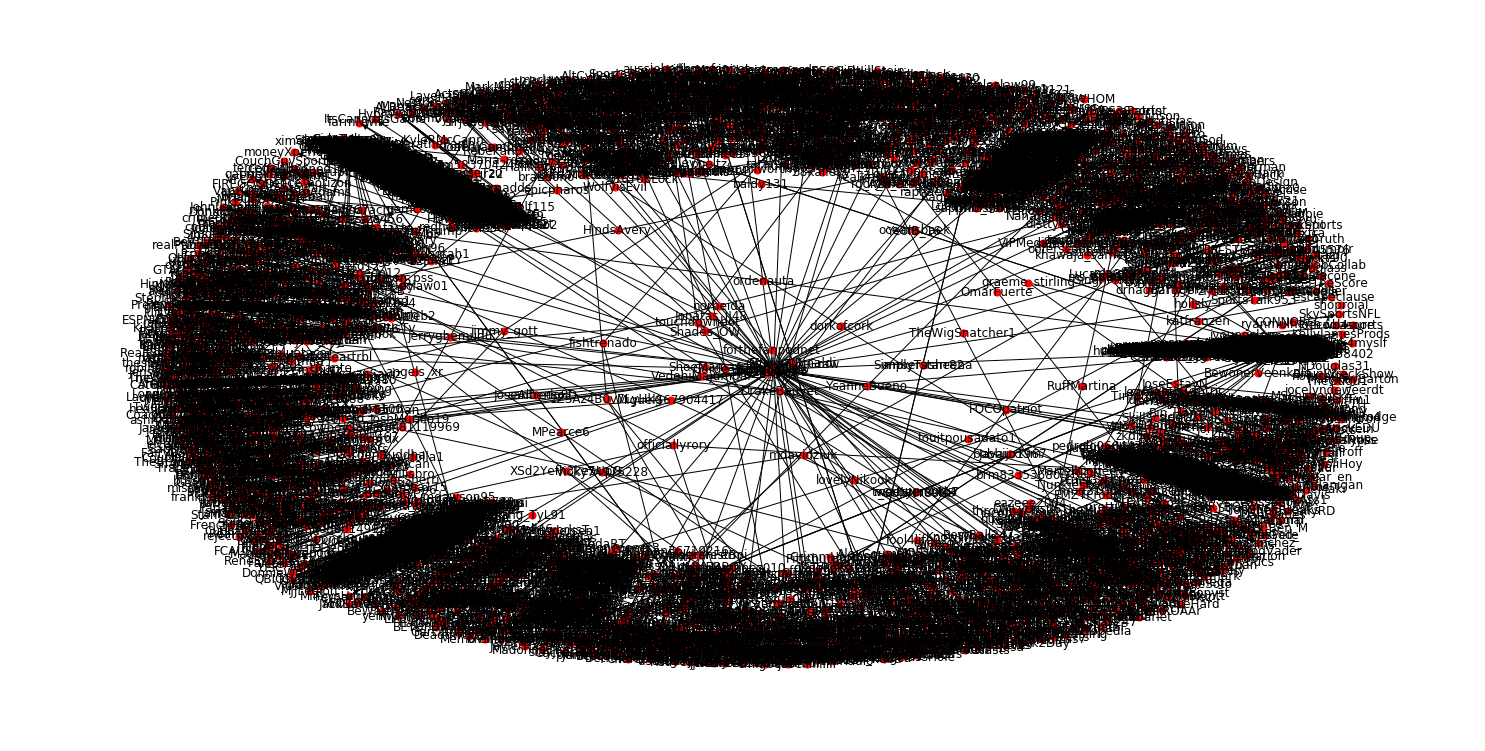

In [59]:
plt.figure(figsize = (20, 10))

nx.draw(g, with_labels = True, node_size = 50, font_size = 12)  
plt.show()  

Next, lets use the data to calculate measures of centrality - Degree, Betweenness and Closeness

In [60]:
degree = nx.degree_centrality(g)
between = nx.betweenness_centrality(g)
close = nx.closeness_centrality(g)

In [61]:
df = pd.DataFrame([degree, between,close]).T

In [62]:
df.reset_index(inplace = True)
df.columns = ['Username','degree','between','close']
df.head()

,Username,degree,between,close
0,007sgtfab,0.000199,0.0,0.000000
1,01andonlyKJM,0.000199,0.0,0.000000
2,0488universe_,0.000597,0.0,0.000697
3,0__chapstick__0,0.000199,0.0,0.000000
4,0hunnieexol0,0.000199,0.0,0.000000


In [64]:
data.merge(df,how = 'inner',left_on='Username',right_on = 'Username').head()

,Unnamed: 0,Message,Tweet Favorite Count,Retweet Count,Created At,Username,Likes,User Description,Following,Followers,degree,between,close
0,0,RT @healingtomato: Vegan Sweet Potato Salad is...,0.0,31,2019-02-07 03:00:46,Couponmamacita,43332,"#LatinaMom to #NYU Senior Student, #TravelBlog...",45125.0,73175.0,0.000398,3.964242e-08,0.000199
1,1,RT @Deporvito: ð¥ðÂ¡Ni empezaba el Superb...,0.0,7,2019-02-07 03:00:41,yamicarrillo7,1253,Mi bebe hermosa . ella es mi vida la amoo,264.0,136.0,0.000199,0.000000e+00,0.000000
2,58,RT @Deporvito: ð¥ðÂ¡Ni empezaba el Superb...,0.0,3,2019-02-07 02:57:47,yamicarrillo7,1253,Mi bebe hermosa . ella es mi vida la amoo,264.0,136.0,0.000199,0.000000e+00,0.000000
3,2,ãä»å¤æ¾éï¼ã #SuperBowl ããã¼ãã...,0.0,0,2019-02-07 03:00:37,nhk_snsenglish,0,NHK Eãã¬ãä¸çã¸çºä¿¡ï¼SNSè±èªè¡ã...,0.0,10342.0,0.000398,0.000000e+00,0.000000
4,3,RT @EpochTimes: The @FBI arrested 169 people d...,0.0,237,2019-02-07 03:00:36,klph69,87964,"Hair Stylist,mom,and wife to a wonderful husba...",4691.0,3634.0,0.000199,0.000000e+00,0.000000


In [65]:
import pandas as pd
sma_ass_1 = pd.read_csv('SMA_Assignment_1.csv')

sma_ass_1 = sma_ass_1.iloc[:, 1:] # removes the first useless column

In [66]:
# get retweet_sent counts, tweet counts and retweets_received counts

user_a_retweets_tweets = pd.pivot_table(sma_ass_1, index = 'User_A', columns = 'Interaction', aggfunc = "count", fill_value = 0).reset_index()
user_a_retweets_tweets.columns = user_a_retweets_tweets.columns.get_level_values(0)
user_a_retweets_tweets.columns = ['User_Name', 'Retweets_sent','tweet_count']

In [67]:
user_b_retweets_rec = pd.pivot_table(sma_ass_1, index = 'User_B', columns = 'Interaction', aggfunc = "count", fill_value = 0).reset_index()

user_b_retweets_rec.columns = user_b_retweets_rec.columns.get_level_values(0)
user_b_retweets_rec.columns = ['User_Name', 'Retweets_rec','tweet_count']

In [68]:
user_b_retweets_rec.drop('tweet_count', inplace = True, axis = 1)

In [69]:
# merge the two for the final results
data2 = user_a_retweets_tweets.merge(user_b_retweets_rec, how = 'outer', left_on = 'User_Name', right_on = 'User_Name').fillna(0)

In [70]:
# merge with other user data
final_df = data[['Username', 'Following', 'Followers']].drop_duplicates().merge(data2, how = 'left', left_on = 'Username', right_on = 'User_Name')
final_df.drop('User_Name', axis = 1, inplace = True)

In [72]:
final_df.head()

,Username,Following,Followers,Retweets_sent,tweet_count,Retweets_rec
0,Couponmamacita,45125.0,73175.0,1.0,0.0,1.0
1,yamicarrillo7,264.0,136.0,2.0,0.0,0.0
2,nhk_snsenglish,0.0,10342.0,0.0,1.0,0.0
3,klph69,4691.0,3634.0,1.0,0.0,0.0
4,MauroxyBofoxez,426.0,183.0,1.0,0.0,0.0


Standardising the variables -

In [77]:
for i in final_df.iloc[:, 1:]:
    mean = final_df[i].mean()
    std = final_df[i].std()
    
    final_df[i] -= mean
    final_df[i] /= std

In [97]:
final_df.drop_duplicates(inplace=True)

In [98]:
# merge network stats with twitter stats
final_df2 = df.merge(final_df, on = "Username")

In [99]:
var_coefficients

follower_ratio         6.895888
mentions_rec_ratio     0.143677
network_1              0.385637
network_2              0.207118
mentions_sent_ratio    0.690370
posts_ratio            0.118623
dtype: float64

In [100]:
final_df2['Score'] = final_df2['Followers']*var_coefficients[0] + final_df2['Retweets_rec']*var_coefficients[1] + \
final_df2['degree']*var_coefficients[2] + final_df2['between']*var_coefficients[3] + \
final_df2['Retweets_sent']*var_coefficients[4] + final_df2['tweet_count']*var_coefficients[5]

In [105]:
# These are the Top 50 influencers using a score calculated by multiplying the logistic regression coefficients to the
# appropriate twitter stats.

final_df2.drop_duplicates(subset='Username',inplace=True)
final_df2.sort_values(by='Score', ascending=False)[:50]

,Username,degree,between,close,Following,Followers,Retweets_sent,tweet_count,Retweets_rec,Score
1057,TheEllenShow,0.011945,0.000000e+00,0.011547,7.881973,65.351979,-0.486534,0.985605,2.912902,450.864058
1290,billboard,0.154888,0.000000e+00,0.154315,0.418368,5.945414,-0.486534,3.347658,32.643985,45.810045
872,Patriots,0.102130,0.000000e+00,0.101732,-0.313206,3.725232,-0.486534,2.166632,23.441507,29.017289
759,Milenio,0.002588,0.000000e+00,0.002190,-0.327668,3.566838,-0.486534,0.985605,0.414492,24.438094
1758,lopezgovlaw,0.014533,1.668946e-05,0.001024,0.283224,-0.015659,31.941654,-0.195422,0.164651,21.949671
1865,nflnetwork,0.003584,0.000000e+00,0.003185,0.120652,3.050620,-0.486534,0.985605,0.789254,20.932539
1117,WORLDSTAR,0.013538,0.000000e+00,0.013140,0.411885,2.985743,-0.486534,0.985605,2.704701,20.764201
3704,nowthisnews,0.000199,0.000000e+00,0.000000,2.691635,1.818290,-0.009649,-0.195422,-0.043550,12.502703
2197,wsbtv,0.002190,3.171393e-07,0.001593,0.198447,0.957855,-0.009649,3.347658,0.289571,7.038154
978,SexySarika,0.000597,0.000000e+00,0.000199,0.737030,-0.022575,-0.486534,44.683592,0.247931,4.844772
